In [1]:
# https://www.kaggle.com/competitions/competitive-data-science-predict-future-sales/data

In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
pd.read_csv(".data/sales_train.csv")

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [4]:
pd.read_csv(".data/shops.csv").sample(5)

,shop_name,shop_id
53,"Уфа ТЦ ""Семья"" 2",53
42,"СПб ТК ""Невский Центр""",42
30,"Москва ТЦ ""Перловский""",30
3,"Балашиха ТРК ""Октябрь-Киномир""",3
46,"Сергиев Посад ТЦ ""7Я""",46


In [5]:
pd.read_csv(".data/item_categories.csv")

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [6]:
pd.read_csv(".data/items.csv")

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [7]:
pd.read_csv(".data/test.csv")

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [8]:
pd.read_csv(".data/sample_submission.csv")

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


In [9]:
df = pd.read_csv(".data/sales_train.csv")
df_items = pd.read_csv(".data/items.csv")

print(df.shape, df_items.shape)

(2935849, 6) (22170, 3)


In [10]:
df_items.columns


Index(['item_name', 'item_id', 'item_category_id'], dtype='object')

In [11]:
df.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [12]:
df = df.merge(df_items[['item_id', 'item_category_id']], on="item_id", how="left")
print(df.shape)

(2935849, 7)


In [13]:
df['item_cnt_day'].value_counts().head(50)

item_cnt_day
 1.0     2629372
 2.0      194201
 3.0       47350
 4.0       19685
 5.0       10474
-1.0        7252
 6.0        6338
 7.0        4057
 8.0        2903
 9.0        2177
 10.0       1820
 11.0       1263
 12.0       1083
 13.0        918
 14.0        716
 15.0        638
 16.0        544
 17.0        438
 18.0        391
 20.0        364
 19.0        347
 21.0        290
 22.0        242
 24.0        204
 23.0        198
 25.0        180
 26.0        176
 30.0        147
 28.0        131
 27.0        130
 31.0        123
 32.0        106
 29.0        102
 33.0         82
 34.0         81
-2.0          78
 35.0         69
 36.0         62
 37.0         61
 41.0         58
 40.0         58
 38.0         54
 39.0         52
 44.0         40
 46.0         39
 42.0         36
 43.0         34
 50.0         33
 45.0         31
 47.0         25
Name: count, dtype: int64

In [14]:
print(f"""
    unique_shops: {df['shop_id'].nunique()}
    unique_items: {df['item_id'].nunique()}
    unique_categories: {df['item_category_id'].nunique()}
""")


    unique_shops: 60
    unique_items: 21807
    unique_categories: 84



In [15]:
df.groupby('shop_id')['item_id'].nunique().sort_values(ascending=False) 

shop_id
25    15367
31    14416
54    13863
28    12572
57    12281
42    12034
6     11856
56    11049
27    10842
21    10145
19     9558
30     9512
16     9375
26     9289
50     9176
46     9149
35     9108
18     9073
44     8894
51     8739
52     8416
37     8405
58     8393
15     8269
7      8246
24     8087
22     7951
47     7912
29     7806
53     7455
14     7451
12     7382
38     7356
59     7336
4      7309
45     7303
41     7227
5      7084
43     6737
10     6002
3      5261
17     5158
13     4865
2      4849
39     4096
48     4063
49     3786
0      3600
32     3299
23     2949
1      2523
55     1985
8      1909
33     1900
34     1860
9      1404
40      817
20      746
11      371
36      258
Name: item_id, dtype: int64

In [16]:
df.groupby('item_category_id')['item_id'].nunique().sort_values(ascending=False)

item_category_id
40    4964
55    2327
37    1777
31    1100
58     769
      ... 
1        2
50       2
10       1
79       1
51       1
Name: item_id, Length: 84, dtype: int64

In [17]:
df.groupby("item_category_id")['item_price'].mean().sort_values(ascending=False)

item_category_id
12    22889.299108
16    18682.561005
11    12686.742018
15    12024.564613
14     9263.114423
          ...     
0        87.800000
66       76.778940
82       32.481014
50       20.500000
71        4.931371
Name: item_price, Length: 84, dtype: float64

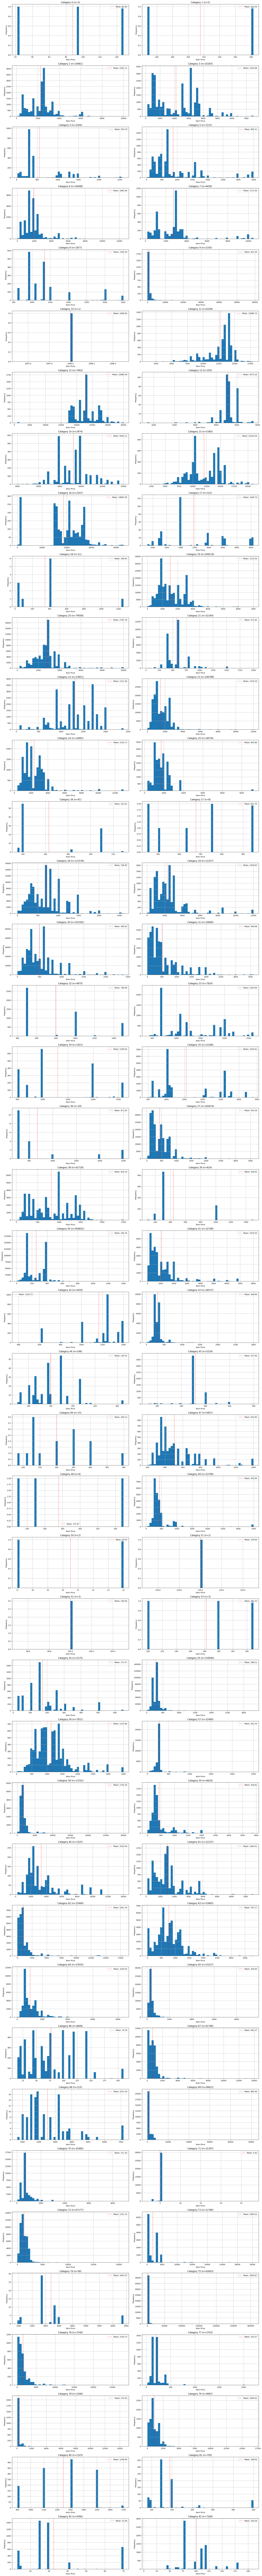

In [18]:
# Create histograms for 'item_price' in every 'item_category_id'
unique_categories = np.sort(df['item_category_id'].unique())

plt.figure(figsize=(20, 200))
for i, category in enumerate(unique_categories, 1):
    plt.subplot(len(unique_categories) // 2 + 1, 2, i)
    category_data = df[df['item_category_id'] == category]['item_price']
    category_data.hist(bins=50)
    mean_price = category_data.mean()
    plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_price:.2f}')
    plt.title(f'Category {category} (n={len(category_data)})')
    plt.xlabel('Item Price')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

In [19]:
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,37
1,03.01.2013,0,25,2552,899.00,1.0,58
2,05.01.2013,0,25,2552,899.00,-1.0,58
3,06.01.2013,0,25,2554,1709.05,1.0,58
4,15.01.2013,0,25,2555,1099.00,1.0,56
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,55
2935845,09.10.2015,33,25,7460,299.00,1.0,55
2935846,14.10.2015,33,25,7459,349.00,1.0,55
2935847,22.10.2015,33,25,7440,299.00,1.0,57


In [13]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df = df.sort_values(by=['date', 'shop_id', 'item_id']).reset_index(drop=True)

In [ ]:
df

In [ ]:
plt.figure(figsize=(20, 8))
monthly_sales_aggregated = df.groupby("date_block_num")['item_cnt_day'].sum()
monthly_sales_aggregated.plot()
plt.title('Monthly Sales Aggregated')
plt.xlabel('Consecutive months')
plt.ylabel('Sum per month')
plt.legend()


In [ ]:
monthly_sales_per_shop = df.groupby(["shop_id", "date_block_num"])['item_cnt_day'].sum()
monthly_sales_per_shop_matrix = monthly_sales_per_shop.unstack().to_numpy()

fig, ax = plt.subplots(monthly_sales_per_shop_matrix.shape[0] // 2, 2, figsize=(20, 200))
for i in range(monthly_sales_per_shop_matrix.shape[0]):
    m, n = (i // 2), (i % 2)
    ax[m, n].plot(monthly_sales_per_shop_matrix[i], marker='o')
    ax[m, n].axhline(np.nanmean(monthly_sales_per_shop_matrix[i]), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.nanmean(monthly_sales_per_shop_matrix[i]):.2f}')
    ax[m, n].axhline(np.nanmin(monthly_sales_per_shop_matrix[i]), color='blue', linestyle='dashed', linewidth=1, label=f'Min: {np.nanmin(monthly_sales_per_shop_matrix[i]):.2f}')
    ax[m, n].axhline(np.nanmax(monthly_sales_per_shop_matrix[i]), color='blue', linestyle='dashed', linewidth=1, label=f'Max: {np.nanmax(monthly_sales_per_shop_matrix[i]):.2f}')
    ax[m, n].set_xlim(-1, 35)
    ax[m, n].set_ylim(min(0, np.nanmin(monthly_sales_per_shop_matrix[i])), 1.1 * np.nanmax(monthly_sales_per_shop_matrix[i]))
    ax[m, n].grid(True)
    ax[m, n].set_title(f'Monthly Sales Shop={i}')
    ax[m, n].set_xlabel('Consecutive months')
    ax[m, n].set_ylabel('Sum per month')
    ax[m, n].legend()

plt.tight_layout()
plt.show()

In [ ]:
def check_value_set_difference_dfs(df1, df2, col):
    """Check what fraction of the values in col in df1 (test) are included in df2 (train). Returns difference values."""
    df1_uq = df1[col].unique()
    df2_uq = df2[col].unique()

    overlap_index = np.isin(df1_uq, df2_uq)
    print(f"{overlap_index.mean()} values from {col} in test are present in train")
    print("Length of non-overlapping values in test:", (~overlap_index).sum())

    return df1_uq[~overlap_index]

_df_test = pd.read_csv(".data/test.csv")
_df = pd.read_csv(".data/sales_train.csv")
check_value_set_difference_dfs(_df_test, _df, "shop_id")
check_value_set_difference_dfs(_df_test, _df, "item_id")

In [42]:
# Price discrepancy for the same item in different shops. Value represents the fraction of items
# where the price differs for at least 2 shops
(df[['item_id', 'item_price']].groupby("item_id")['item_price'].nunique().values > 1).mean() # type: ignore

np.float64(0.7282523960196268)

In [36]:
# Fraction of items in the train set where the price is different for the same item in the same shop (at least 2)
(df[['shop_id', 'item_id', 'item_price']].groupby(['shop_id', "item_id"])['item_price'].nunique().values > 1).mean() # type: ignore

np.float64(0.3473512463336194)

In [43]:
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,2013-01-01,0,2,991,99.0,1.0,67
1,2013-01-01,0,2,1472,2599.0,1.0,23
2,2013-01-01,0,2,1905,249.0,1.0,30
3,2013-01-01,0,2,2920,599.0,2.0,21
4,2013-01-01,0,2,3320,1999.0,1.0,19
...,...,...,...,...,...,...,...
2935844,2015-10-31,33,59,20730,499.0,1.0,72
2935845,2015-10-31,33,59,20866,699.0,1.0,72
2935846,2015-10-31,33,59,20949,5.0,1.0,71
2935847,2015-10-31,33,59,21369,169.0,1.0,40


In [44]:
df_test

NameError: name 'df_test' is not defined

In [79]:
import torch
from torch.utils.data import DataLoader, TensorDataset

import torch.nn as nn
import torch.optim as optim

In [ ]:
df.groupby(["shop_id", "item_id"])['item_cnt_day'].size()

In [ ]:
and

In [ ]:
class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTMRegressor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)
        c0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [ ]:

X_train = torch.randn(1000, 10, 1)  # Example data with sequence length 10 and 1 feature
y_train = torch.randint(0, 2, (1000,))  # Example labels

dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Initialize the model, loss function, and optimizer
input_size = 1
hidden_size = 50
output_size = 2

model = LSTMNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], Loss: {loss.item():.4f}')

print("Training complete.")